# Random Forest Classification

## Use the same type of classifier with multiple instances, each training on a different combination of the training set and on a reduced set of features. Useful to determine feature importance on the output model. 

### Import the necessary packages

In [1]:
import pyodbc 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE


### Fetch data from sql server that will be used for Training

In [2]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-HVRMUNPF;'
                      'PORT=1433;'
                      'Database=RENTERS_STP;'
                      'Trusted_Connection=yes;'
                      )

query = 'SELECT  * from [RENTERS_STP].[dbo].[DR_DetailedRequest_classification]'

    
df = pd.read_sql(query, conn)


### Get the 'features' and 'labels' from the dataset. Split the dataset to training and testing datasets



In [3]:
y=df['PREDICTION_VALUE_Y_BOOL']
X = pd.get_dummies(df.drop(['PREDICTION_VALUE_Y_BOOL'], axis=1)).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42, stratify=y)

SEED=1

### Instantiate the model

In [4]:
# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)


### Fit and train the model

In [5]:
# Fit rf to the training set    
rf.fit(X_train, y_train) 


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

### Model Evaluation

In [6]:
# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.6f}'.format(rmse_test))


Test set RMSE of rf: 0.086582


### Plot the important features

ANI_CALL_COUNT_FROM_PREV_CLM_CREATION              0.000000
SUBPRODUCER_NUMBER_0L84175                         0.000000
SUBPRODUCER_NUMBER_0L84189                         0.000000
SUBPRODUCER_NUMBER_0L84363                         0.000000
SUBPRODUCER_NUMBER_0L84372                         0.000000
SUBPRODUCER_NUMBER_0L84406                         0.000000
SUBPRODUCER_NUMBER_0L84417                         0.000000
SUBPRODUCER_NUMBER_0L84442                         0.000000
SUBPRODUCER_NUMBER_0L84481                         0.000000
SUBPRODUCER_NUMBER_0L84507                         0.000000
SUBPRODUCER_NUMBER_0L84522                         0.000000
SUBPRODUCER_NUMBER_0L84543                         0.000000
SUBPRODUCER_NUMBER_0L84549                         0.000000
SUBPRODUCER_NUMBER_0L84556                         0.000000
SUBPRODUCER_NUMBER_0L84570                         0.000000
SUBPRODUCER_NUMBER_0L84577                         0.000000
SUBPRODUCER_NUMBER_0L84584              

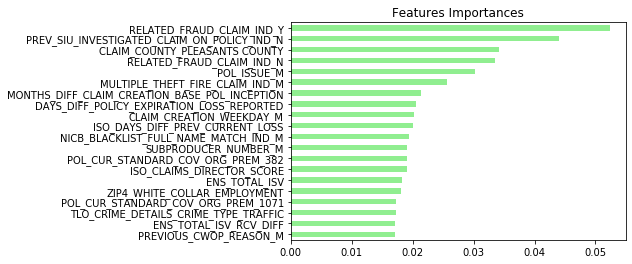

In [7]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances

importance_sorted = importances.sort_values()


print (importance_sorted)
# Draw a horizontal barplot of the top 10 important features
importance_sorted.tail(20).plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()